Accuracy: 0.982739420935412

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      4710
           1       0.98      0.99      0.98      4270

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



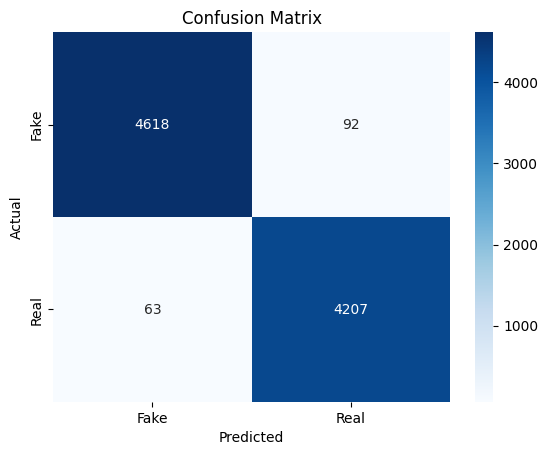


Sample Prediction: Fake


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

fake = pd.read_csv('Fake.csv')
real = pd.read_csv('True.csv')

fake['label'] = 0  # 0 for fake
real['label'] = 1  # 1 for real

data = pd.concat([fake, real], axis=0)
data = data[['text', 'label']]  

data = data.sample(frac=1, random_state=42).reset_index(drop=True)

X = data['text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

def predict_news(article_text):
    article_tfidf = vectorizer.transform([article_text])
    prediction = model.predict(article_tfidf)
    return "Real" if prediction[0] == 1 else "Fake"

sample_article = """
President Donald Trump said he believes he will be fairly treated in the investigation into Russian meddling.
"""
print("\nSample Prediction:", predict_news(sample_article))
